#### 한국어 분석을 위한 환경 구성
[vs 2015 설치]
- 제공한 설치 파일을 실행하고 사용자 지정을 선택하여 프로그래밍 언어에 있는 visual c++을 추가하여 설치.

[JDK 설치]
- 제공한 파일을 설치. 설치시 그냥 기본으로 설치.

[JDK 환경변수를 설정]
- 탐색기에서 내 pc에서 마우스 우클릭하고 속성 클릭.
- 환경변수를 클릭.
- 새로 만들기를 눌러 다음과 같이 작성.
- 변수 이름 : JAVA_HOME
- 변수 값 : C:\Program Files\Java\jdk1.8.0_281
- 주피터를 완전히 종료하고 다시 실행.

[필요한 라이브러리 설치]
- pip install konlpy==0.5.1
- pip install jpype1
- pip install jpype1-py3

#### Word Cloud를 사용하기 위한 설정
- pip install pytagcloud
- pip install pygame
- pip install simplejson

In [1]:
import pandas as pd
from konlpy.tag import Hannanum, Okt
from collections import Counter
import pytagcloud, re
from IPython.display import Image

pygame 2.0.1 (SDL 2.0.14, Python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# 테스트 확인.
tagger = Hannanum()

# 명사만 가져오기.
result1 = tagger.nouns('안녕하세요 반갑습니다 오늘 날씨가 참 좋네요 내일 같이 여행이나 가죠')
result1

# 명사만 가져오기.
result2 = tagger.morphs('안녕하세요 반갑습니다 오늘 날씨가 참 좋네요 내일 같이 여행이나 가죠')
result2

# 개수.
count = Counter(result2)
test = count.most_common()
test

[('요', 2),
 ('가', 2),
 ('이', 2),
 ('안녕', 1),
 ('하', 1),
 ('세', 1),
 ('반갑', 1),
 ('습니다', 1),
 ('오늘', 1),
 ('날씨', 1),
 ('참', 1),
 ('좋', 1),
 ('네', 1),
 ('내', 1),
 ('ㄹ', 1),
 ('같', 1),
 ('여행', 1),
 ('이나', 1),
 ('죠', 1)]

#### 나무위키에서 수집한 데이터 읽기.
- Crawling code 참고.

In [3]:
df = pd.read_csv('namuwiki.csv')
df.head(10)

,title,content
0,카멜롯(스타크래프트),시즌3 대회 본선 맵 카멜롯 안드로메다 아웃사이더 SE 서킷브레이커...
1,만악의 근원/창작물,상위 문서: 만악의 근원1. 개요2. 목록2.1. 보편적2.2. 장르별2.3. 작품...
2,데미안(스타크래프트),시즌2 대회 본선 맵 서킷브레이커 태풍의 눈 벤젠 데미안 데미안(Demi...
3,Merry Christmas,자세한 내용은 머라이어 캐리/음반 목록 문서를의 번째 문단을의 부분을 참고하십시오...
4,이도희,이도희의 수상 및 감독 경력 [ 펼치기 · 접기 ] 대한민국 여자 배구 국가대표...
5,유리 가가린,은(는) 여기로 연결됩니다. 네이버 웹툰 '테러맨'의 등장인물에 대한 내용은 가가린...
6,Apex 레전드/아이템,상위 문서: Apex 레전드 [ 펼치기 · 접기 ]정식 시리즈타이탄폴캠페인 · 파일...
7,관우(삼국지톡),6년 전 모습(8화 참조) 첫 등장(7화) 반동탁 연합 당시 시즌 5 시...
8,풀라어,풀라어: Fulfulde Pulaar Pular영어: Fula language[1]...
9,BloxVerse: Unlimited,제작자Senor_Habanero제작 날짜2018년 3월 18일최근 업데이트 날짜20...


In [4]:
# 결측치 확인.
df.isna().sum()

title      0
content    1
dtype: int64

In [5]:
# 결측치 제거.
df.dropna(inplace=True)
df.isna().sum()

title      0
content    0
dtype: int64

In [6]:
# text 정제 함수 : 한글 이외의 문자는 전부 제거.
def text_cleaning(text) :
    # 한글 정규식 정의(띄어쓰기, ㄱ ~ ㅣ, 가 ~ 힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    
    # 정제.(정규식에 해당하지 않는 글자는 길이가 0은 문자열로 변환한다.)
    result = hangul.sub('', text)
    return result

In [7]:
# Test
print(df['content'][0])
print('-'*135)
print(text_cleaning(df['content'][0]))

시즌3 대회 본선 맵          카멜롯 안드로메다 아웃사이더 SE 서킷브레이커  카멜롯(Camelot)  맵 정보  타   입 길목형 힘싸움맵 사이즈 128 × 96 인원수 2인용 타일셋 Space Platform (우주) 맵 제작자 주현서(LatiAs) 이 맵이 사용된 공식 리그  아프리카TV 스타리그 시즌3 모든 버전에서의 종족별 상대전적테란 : 저그4 : 2저그 : 프로토스6 : 3프로토스 : 테란3 : 2아프리카TV 스타리그 시즌3에 사용된 공식맵으로 맵 제작자는 데미안을 제작했던 LatiAs다. 이 맵은 맵 제작자인 LatiAs의 블로그에 이미 2년 전에 올라온 작품이었다. 당시 블로그에는 1.3 버전이 올려져 있었다. 초기 맵 제목은 '근심장'이었으며 맵이 수정되면서 맵 이름이 카멜롯으로 바뀌었다. 1.4버전부터는 ASL 공식맵으로 지정되면서 그에 맞춰 수정이 된 것으로 보인다.개인 방송을 진행하는 프로게이머들의 의견이 분분했는데 김정우 이제동 김명운 등 저그 게이머들은 후반에 가면 저그가 할 만해지는 맵이라는 의견을 냈다. 그러나 테란 게이머인 이영호는 저그가 이 맵에서 힘들어 보인다는 말을 했다. 아울러 염보성도 센터에 터렛 건설이 가능하다는 이유를 들어 테란에게 유리한 맵이라고 보았다. 김택용은 테란이 미네랄 확장을 하지 못할 것 같다는 말을 남겼고 도재욱은 본진 미네랄이 10덩이라는 이유로 토스맵일 거라는 말을 했다. 실제로도 이제동 등 저그와의 연습 게임에서 연달아 이겼다. 그러나 송병구는 염보성과의 게임 이후 이 맵에서 토스는 빡세다고.그 때문인지 처음 공개된 1.4버전이 나온 지 얼마나 됐다고 바로 1.5버전으로 수정되었다. 본진 500짜리 미네랄이 앞마당으로 옮겨졌으며 6시와 12시의 앞마당 쪽 입구가 한 칸 넓어진 대신에 반대쪽 입구를 삭제했다. 1시와 7시의 멀티 입구 또한 한 칸 확장되었다. 그 외 사항들은 맵 다운로드에 링크된 강구열의 블로그를 참조할 것.저그 테란 프로토스 게이머들 모두 자신의 종족이 할 만하다거나 유리하

In [8]:
# 한글 정제.
df['title']   = df['title'].apply(lambda x : text_cleaning(x))
df['content'] = df['content'].apply(lambda x : text_cleaning(x))
df.head(10)

,title,content
0,카멜롯스타크래프트,시즌 대회 본선 맵 카멜롯 안드로메다 아웃사이더 서킷브레이커 카...
1,만악의 근원창작물,상위 문서 만악의 근원 개요 목록 보편적 장르별 작품 ㄱ ㄴ ㄷ ㄹ ㅁ ㅂ ㅅ ㅇ ...
2,데미안스타크래프트,시즌 대회 본선 맵 서킷브레이커 태풍의 눈 벤젠 데미안 데미안 맵 정보...
3,,자세한 내용은 머라이어 캐리음반 목록 문서를의 번째 문단을의 부분을 참고하십시오 ...
4,이도희,이도희의 수상 및 감독 경력 펼치기 접기 대한민국 여자 배구 국가대표팀주장...
5,유리 가가린,은는 여기로 연결됩니다 네이버 웹툰 테러맨의 등장인물에 대한 내용은 가가린슈퍼스트링...
6,레전드아이템,상위 문서 레전드 펼치기 접기 정식 시리즈타이탄폴캠페인 파일럿 타이탄 맵...
7,관우삼국지톡,년 전 모습화 참조 첫 등장화 반동탁 연합 당시 시즌 시즌 초반화 ...
8,풀라어,풀라어 영어 프랑스어 풀라어 사용 지역 개요 문법 문자 기타풀라어는 니제르콩고...
9,,제작자제작 날짜년 월 일최근 업데이트 날짜년 월 일최대 플레이어 수명장르모험기어 허...


In [9]:
# 말뭉치 생성.(각 컬럼의 문자열들을 하나로 결합.)
title_corpus   = ''.join(df['title'].tolist())
content_corpus = ''.join(df['content'].tolist())
print(title_corpus)

카멜롯스타크래프트만악의 근원창작물데미안스타크래프트 이도희유리 가가린 레전드아이템관우삼국지톡풀라어 열하일기오스트리아헝가리 제국키사라기 치하야사이버 다크 엔드 드래곤이도희영국식 영어대마계촌랜슬롯 시리즈코마유튜버그랑블루 판타지캐릭터수속성브롤스타즈게임 모드브롤 볼파일저별처럼틀강원 조성원이도희파일블랙 클로버       이도희서핑하자 조성원리바이어던수원 현대건설 힐스테이트시즌치치지마 식인 사건데미안스타크래프트서핑하자헬레나 본햄 카터이도희만악의 근원창작물틀서울 이랜드 라이스 샤워 시베리안 허스키서핑하자 파우캣코마유튜버권순규듀얼블레이드벤젠스타크래프트김혜인방송인양천구 을알렉산다르 세탁상행정사례진저브레드상원사순애보블랙 클로버티스푼 공사파멸의 바퀴양천구 갑엔터테인먼트영국식 영어파일    로스트아크행사한구레랜덤채팅의 그녀회차환상의 타이밍 틀수원 현대건설 힐스테이트 역대 감독블랙 클로버틀쿠웨이트의 대외관계잭 스나이더의 저스티스 리그이도희파일틀팔레스타인의 대외관계검은 고양이 네로이도희방위표한구레틀김천 상무리오넬 메시만악의 근원창작물태풍의 눈스타크래프트파일틀수단 공화국의 대외관계전원일기수렴 진화여성시대 양희은 서경석입니다트로이영화


In [10]:
# 형태소 분석.
tagger = Okt()

# 명사만을 가져옴.
title_nouns   = tagger.nouns(title_corpus)
content_nouns = tagger.nouns(content_corpus)

# print(title_nouns)
# print(content_nouns)

In [11]:
# 각 단어들의 빈도수.
title_count   = Counter(title_nouns)
content_count = Counter(content_nouns)

# print(title_count)
# print(content_count)

#### 키워드 다듬기

In [12]:
# Word Coloud는 2글자 이상어야만 하기 때문에 1글자 단어를 모두 빼고 2글자 이상인 것만 새로 담기.
print(f'제목 개수 : {len(title_count)}')
print(f'내용 개수 : {len(content_count)}')
print('-'*40)

# 제목과 내용을 담을 딕셔너리 생성.
title_dict = {}
content_dict = {}

for key in title_count :
    # 글자 길이가 1보다 크면 제목 딕셔너리에 담기.
    if len(key) > 1 :
        title_dict[key] = title_count[key]

for key in content_count :
    # 글자 길이가 1보다 크면 내용 딕셔너리에 담기.
    if len(key) > 1 :
        content_dict[key] = content_count[key]

# 2글자 미만을 제외한 개수.
remove_title_count   = Counter(title_dict)
remove_content_count = Counter(content_dict)

print(f'2글자 미만을 제외한 제목 개수 : {len(title_dict)}개')
print(f'2글자 미만을 제외한 내용 개수 : {len(content_dict)}개')

제목 개수 : 128
내용 개수 : 20509
----------------------------------------
2글자 미만을 제외한 제목 개수 : 118개
2글자 미만을 제외한 내용 개수 : 19666개


In [13]:
# 불용어 제거 .
# 불용어(stopwords) : 분석시 필요하지 않는 단어들을 의미.
# 불용어 읽기.
with open('data10/korean_stopwords.txt', encoding='utf-8') as fp :
    stopwords = fp.readlines()

# \n 제거
stopwords = [x.strip() for x in stopwords]
stopwords

['아',
 '휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조

In [14]:
# 불용어를 제외한 나머지를 새롭게 담기.
print(f'2글자 미만을 제외한 제목 개수 : {len(remove_title_count)}개')
print(f'2글자 미만을 제외한 내용 개수 : {len(remove_content_count)}개')
print('-'*40)

content_dict = {}
for key in remove_content_count :
    # 현재 글자가 불용어에 포함되어 있지 않으면 담기.
    if key not in stopwords :
        content_dict[key] = remove_content_count[key]
        
title_dict = {}
for key in remove_title_count :
    if key not in stopwords :
        title_dict[key] = remove_title_count[key]
        
remove_content_count = Counter(content_dict)
remove_title_count = Counter(title_dict)

print(f'불용어를 제외한 제목 개수 : {len(remove_title_count)}개')
print(f'불용어를 제외한 내용 개수 : {len(remove_content_count)}개')

2글자 미만을 제외한 제목 개수 : 118개
2글자 미만을 제외한 내용 개수 : 19666개
----------------------------------------
불용어를 제외한 제목 개수 : 118개
불용어를 제외한 내용 개수 : 19558개


#### Word Cloud로 시각화
- 한글 폰트 설치.
- https://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf
- 내려받은 폰트를 해당 경로에 넣기.
- C:\Users\계정\anaconda3\Lib\site-packages\pytagcloud\fonts
- C:\Users\계정\anaconda3\Lib\site-packages\pytagcloud\fonts\font.json 파일에 폰트를 등록.
- 설치 없이도 한글을 지원하는 폰트를 등록해줘도 작동.
- {
        "name": "NanumGothic",
        "ttf" : "NanumGothic.ttf",
        "web" : "http://fonts.googleapis.com/css?family=Nanum+Gothic"
  }

In [15]:
# title에서 가장 많이 나온 단어 100개를 추출.
ranked_title_tags = remove_title_count.most_common(100)

# 워드 클라우드를 위한 단어 사전을 생성.
title_taglist = pytagcloud.make_tags(ranked_title_tags)

# 워드 클라우드 이미지를 생성.
# size : 캔버스 사이즈. 
# fontname : 글꼴 종류.
# rectangular : 워드클라우드를 사각형박스 형태로 할 건지, 원형으로 출력할 건지 명시.
pytagcloud.create_tag_image(title_taglist, 'title_word.jpg', size=(700, 400), fontname='NanumGothic', rectangular=False)

In [16]:
# content에서 가장 많이 사용하는 단어 100개를 추출.
ranked_content_tags = remove_content_count.most_common(100)

# 워드 클라우드를 위한 단어 사전을 생성.
content_taglist = pytagcloud.make_tags(ranked_content_tags)

# 워드 클라우드 이미지를 생성.
pytagcloud.create_tag_image(content_taglist, 'content_word.jpg', size=(700, 400), fontname='NanumGothic', rectangular=False)

Title


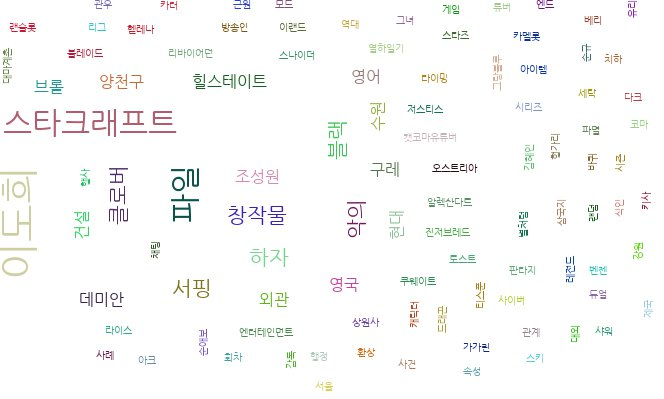

In [17]:
print('Title')
Image(filename='title_word.jpg')

Content


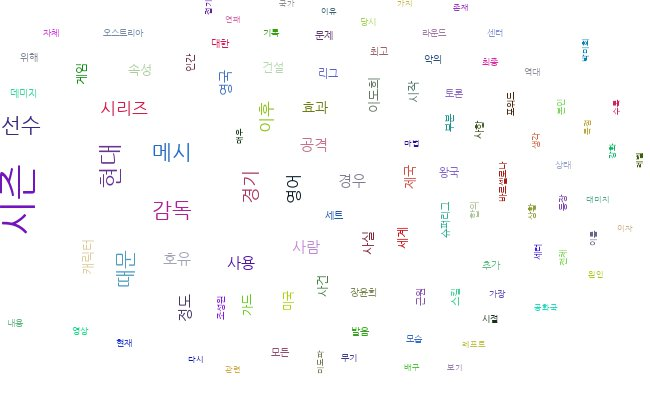

In [18]:
print('Content')
Image(filename='content_word.jpg')